<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="5"></br> UE Deep Learning: Lab sessions 1 and 2</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>15th and 19th of Octobre 2018</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">pierre.tandeo@imt-atlantique.fr</span>
</CENTER>
<CENTER>
<span style="color:blue">pierre-henri.conze@imt-atlantique.fr</span>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>
</div>

The aim of this practice is to explain $Y$ (output variable) as a function of $X$ (input variable) using neural networks. Here, $X$ are continuous and $Y$ can be continuous (*regression*) or discrete (*classification*). These 2 aspects are treated in the deep learning framework. Both linear and nonlinear cases will be covered in this lab session.

We use the Keras Python library to implement deep learning architectures. This interface has the following characteristics:
- it is developped for both *Tensorflow* and *Theano*
- it can be applied to CPU or GPU without distinction
- it can interact with classical machine learning libraries like *Scikit-learn*

This lab session is an introduction. It gives you the general concepts of neural nets and helps you to implement them using a dedicated Python library. If you want to play with similar regression/classification examples in small dimensions, you can use http://playground.tensorflow.org/. For more details concerning Keras, please visit the documentation at https://keras.io/.

In [1]:
# Import libraries
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(15,15)

Populating the interactive namespace from numpy and matplotlib


**Regression problems**

Simple regression is a linear problem between continuous variables $X$ and $Y$. Here, we write the model $Y=2+0.5X$ and generate $Y$ using an additional Gaussian standard random noise.

Text(0,0.5,'Y')

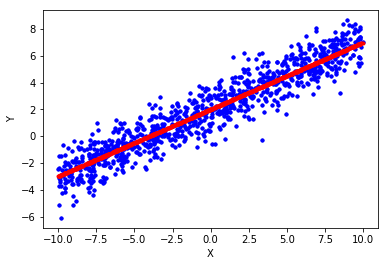

In [2]:
# Generate data
n=1000
X=random.uniform(-10,10,n)
Y_true=2+0.5*X # true model
Y=Y_true+random.normal(0,1,n) # add noise to the truth
plot(X,Y,'b.')

# Plot noisy data and true model
plot(X,Y,'b.')
plot(X,Y_true,'r.')
xlabel('X')
ylabel('Y')

Here, the objective is to build a neural net to fit the linear relationships between $X$ and $Y$. We use the mean absolute error as loss function and the stochastic gradient descent (sgd) algorithm for the optimization procedure. Then, we fit the model on a training dataset (80%) and we evaluate the performance of the model on a test dataset (20%). Finally, we plot the estimated parameters corresponding to the weights for each neurone.

In [3]:
# Import deep learning library
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD, Adam

# Build our model
model_regress1 = Sequential()
 
# Declare the layers
layers = [Dense(units=1, input_dim=1), Activation('linear')]
 
# Add the layers to the model
for layer in layers:
    model_regress1.add(layer)

# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_regress1.compile(loss='mean_absolute_error', optimizer=sgd)
 
# Fit the model
model_regress1.fit(X, Y, validation_split=0.2, epochs=100)

# Model summary and weights
model_regress1.get_weights() # model_regress1.layers[0].get_weights()

Using TensorFlow backend.


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 1.3460 - val_loss: 0.9184
Epoch 2/100
800/800 [==============================] - 0s 63us/step - loss: 1.0119 - val_loss: 0.8886
Epoch 3/100
800/800 [==============================] - 0s 67us/step - loss: 0.8830 - val_loss: 0.8369
Epoch 4/100
800/800 [==============================] - 0s 67us/step - loss: 0.8235 - val_loss: 0.9252
Epoch 5/100
800/800 [==============================] - 0s 72us/step - loss: 0.8109 - val_loss: 0.8517
Epoch 6/100
800/800 [==============================] - 0s 65us/step - loss: 0.7941 - val_loss: 0.8419
Epoch 7/100
800/800 [==============================] - 0s 55us/step - loss: 0.8119 - val_loss: 0.8540
Epoch 8/100
800/800 [==============================] - 0s 61us/step - loss: 0.7855 - val_loss: 0.8420
Epoch 9/100
800/800 [==============================] - 0s 57us/step - loss: 0.7924 - val_loss: 0.9399
Epoch 10/100
800/800 [===============

800/800 [==============================] - 0s 65us/step - loss: 0.7735 - val_loss: 0.8415
Epoch 81/100
800/800 [==============================] - 0s 64us/step - loss: 0.7738 - val_loss: 0.8474
Epoch 82/100
800/800 [==============================] - 0s 51us/step - loss: 0.7743 - val_loss: 0.8477
Epoch 83/100
800/800 [==============================] - 0s 54us/step - loss: 0.7729 - val_loss: 0.8437
Epoch 84/100
800/800 [==============================] - 0s 59us/step - loss: 0.7756 - val_loss: 0.8468
Epoch 85/100
800/800 [==============================] - 0s 57us/step - loss: 0.7734 - val_loss: 0.8412
Epoch 86/100
800/800 [==============================] - 0s 65us/step - loss: 0.7748 - val_loss: 0.8411
Epoch 87/100
800/800 [==============================] - 0s 58us/step - loss: 0.7733 - val_loss: 0.8410
Epoch 88/100
800/800 [==============================] - 0s 64us/step - loss: 0.7743 - val_loss: 0.8434
Epoch 89/100
800/800 [==============================] - 0s 68us/step - loss: 0.7741 - 

[array([[0.4993263]], dtype=float32), array([2.0551267], dtype=float32)]

We can see that the estimated parameters are closed to the true ones ($2$ for the intercept and $0.5$ for the slope). Below, we plot the true model (red) and the estimated one (green).

Text(0,0.5,'Y')

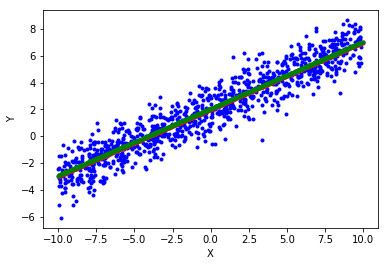

In [4]:
# Make prediction using the model
Y_hat = model_regress1.predict(X)

# Plot noisy data, true model and prediction
plot(X,Y,'b.')
plot(X,Y_true,'r.',linewidth=2)
plot(X,Y_hat,'g.',linewidth=2)
xlabel('X')
ylabel('Y')

Now, let us consider a model where for a same input variable $X$, we associate 2 output variables $Y_0$ and $Y_1$ defined by $Y_0=2+0.5X$ and $Y_1=-2-0.5X$. As previously, we use Gaussian additive noises to generate $Y_0$ and $Y_1$.

Text(0,0.5,'Y')

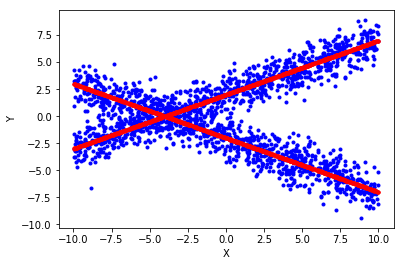

In [5]:
# Generate data
n=1000
X=random.uniform(-10,10,n)
Y0_true=2+0.5*X # true model
Y0=Y0_true+random.normal(0,1,n) # add noise
Y1_true=-2-0.5*X # true model
Y1=Y1_true+random.normal(0,1,n) # add noise
Y_true=vstack([Y0_true,Y1_true]).T
Y=vstack([Y0,Y1]).T

# Plot noisy data and true model
plot(X,Y,'b.')
plot(X,Y_true,'r.')
xlabel('X')
ylabel('Y')

Here we modify the hidden layer to account for the 2 output variables $Y_0$ et $Y_1$.

In [6]:
# Build our model
model_regress2 = Sequential()

# Declare the layers
layers = [Dense(units=2,input_dim=1), Activation('linear')]

# Add the layers to the model
for layer in layers:
    model_regress2.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_regress2.compile(loss='mean_absolute_error', optimizer=sgd)
 
# Fit the model
model_regress2.fit(X, Y, validation_split=0.2, epochs=100)
                   
# Model weights
model_regress2.get_weights()

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 179us/step - loss: 1.6576 - val_loss: 1.3212
Epoch 2/100
800/800 [==============================] - 0s 63us/step - loss: 1.0773 - val_loss: 1.0007
Epoch 3/100
800/800 [==============================] - 0s 57us/step - loss: 0.9035 - val_loss: 0.8558
Epoch 4/100
800/800 [==============================] - 0s 52us/step - loss: 0.8397 - val_loss: 0.8238
Epoch 5/100
800/800 [==============================] - 0s 56us/step - loss: 0.8282 - val_loss: 0.7947
Epoch 6/100
800/800 [==============================] - 0s 70us/step - loss: 0.8217 - val_loss: 0.8044
Epoch 7/100
800/800 [==============================] - 0s 61us/step - loss: 0.8242 - val_loss: 0.8160
Epoch 8/100
800/800 [==============================] - 0s 60us/step - loss: 0.8165 - val_loss: 0.7837
Epoch 9/100
800/800 [==============================] - 0s 54us/step - loss: 0.8159 - val_loss: 0.7960
Epoch 10/100
800/800 [=============

800/800 [==============================] - 0s 85us/step - loss: 0.8112 - val_loss: 0.7859
Epoch 81/100
800/800 [==============================] - 0s 66us/step - loss: 0.8117 - val_loss: 0.7838
Epoch 82/100
800/800 [==============================] - 0s 62us/step - loss: 0.8120 - val_loss: 0.7840
Epoch 83/100
800/800 [==============================] - 0s 80us/step - loss: 0.8117 - val_loss: 0.7839
Epoch 84/100
800/800 [==============================] - 0s 70us/step - loss: 0.8109 - val_loss: 0.7838
Epoch 85/100
800/800 [==============================] - 0s 82us/step - loss: 0.8113 - val_loss: 0.7850
Epoch 86/100
800/800 [==============================] - 0s 70us/step - loss: 0.8112 - val_loss: 0.7854
Epoch 87/100
800/800 [==============================] - 0s 105us/step - loss: 0.8120 - val_loss: 0.7838
Epoch 88/100
800/800 [==============================] - 0s 69us/step - loss: 0.8113 - val_loss: 0.7832
Epoch 89/100
800/800 [==============================] - 0s 58us/step - loss: 0.8113 -

[array([[ 0.50410146, -0.5061168 ]], dtype=float32),
 array([ 2.009722 , -1.9068071], dtype=float32)]

We then compare the fitted (green) and true (red) models.

Text(0,0.5,'Y')

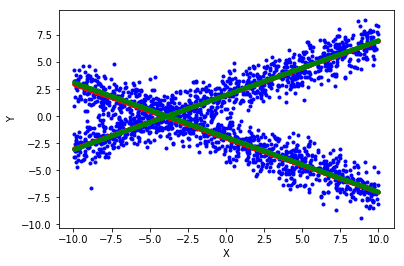

In [7]:
# Make prediction using the model
Y_hat = model_regress2.predict(X)

# Plot train, test and hat
plot(X,Y,'b.')
plot(X,Y_true,'.r',linewidth=2)
plot(X,Y_hat,'.g',linewidth=2)
xlabel('X')
ylabel('Y')

**Classification problems**

In a classification problem, $Y$ is a discrete variable with various classes. Here, $Y$ is binary and takes its values between $0$ and $1$. We write the model as $Y=f\left(2+0.5 X\right)$ with $f$ the logistic transfer function (sigmoid). As previously we generate $Y$ adding Gaussian perturbations.

Text(0,0.5,'Y')

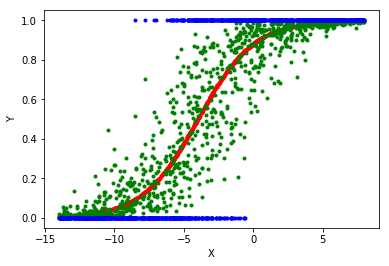

In [8]:
# Generate data
n=1000
X=random.uniform(-14,8,n)
Y_true=1/(1+exp(-(2+0.5*X))) # true model
Y_noise=1/(1+exp(-(2+0.5*X+random.normal(0,1,n)))) # add noise to the truth
Y=(Y_noise>0.5).astype(float) # transform to binary data

# Plot true model and noisy data
plot(X,Y_true,'r.')
plot(X,Y_noise,'g.')
plot(X,Y,'b.')
xlabel('X')
ylabel('Y')

We build our neural net using a sigmoid activation function, corresponding to the logistic function. For such a classification problem, we try to minimize a loss function based on the binary cross-entropy.

In [9]:
# Build our model
model_classif1 = Sequential()

# Declare the layers
layers = [Dense(units=1, input_dim=1), Activation('sigmoid')]
 
# Add the layers to the model
for layer in layers:
    model_classif1.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_classif1.compile(loss='binary_crossentropy', optimizer=sgd)
 
# Fit the model
model_classif1.fit(X, Y, validation_split=0.2, epochs=200)

# Model weights
model_classif1.get_weights()

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 245us/step - loss: 0.3454 - val_loss: 0.3397
Epoch 2/200
800/800 [==============================] - 0s 88us/step - loss: 0.3074 - val_loss: 0.3098
Epoch 3/200
800/800 [==============================] - 0s 86us/step - loss: 0.2852 - val_loss: 0.2911
Epoch 4/200
800/800 [==============================] - 0s 81us/step - loss: 0.2708 - val_loss: 0.2789
Epoch 5/200
800/800 [==============================] - 0s 83us/step - loss: 0.2611 - val_loss: 0.2695
Epoch 6/200
800/800 [==============================] - 0s 93us/step - loss: 0.2543 - val_loss: 0.2627
Epoch 7/200
800/800 [==============================] - 0s 91us/step - loss: 0.2484 - val_loss: 0.2572
Epoch 8/200
800/800 [==============================] - 0s 81us/step - loss: 0.2446 - val_loss: 0.2529
Epoch 9/200
800/800 [==============================] - 0s 82us/step - loss: 0.2407 - val_loss: 0.2493
Epoch 10/200
800/800 [=============

800/800 [==============================] - 0s 76us/step - loss: 0.2071 - val_loss: 0.2120
Epoch 81/200
800/800 [==============================] - 0s 90us/step - loss: 0.2069 - val_loss: 0.2119
Epoch 82/200
800/800 [==============================] - 0s 87us/step - loss: 0.2069 - val_loss: 0.2118
Epoch 83/200
800/800 [==============================] - 0s 73us/step - loss: 0.2068 - val_loss: 0.2117
Epoch 84/200
800/800 [==============================] - 0s 83us/step - loss: 0.2067 - val_loss: 0.2116
Epoch 85/200
800/800 [==============================] - 0s 73us/step - loss: 0.2066 - val_loss: 0.2115
Epoch 86/200
800/800 [==============================] - 0s 80us/step - loss: 0.2066 - val_loss: 0.2114
Epoch 87/200
800/800 [==============================] - 0s 94us/step - loss: 0.2065 - val_loss: 0.2114
Epoch 88/200
800/800 [==============================] - 0s 97us/step - loss: 0.2064 - val_loss: 0.2113
Epoch 89/200
800/800 [==============================] - 0s 81us/step - loss: 0.2064 - 

800/800 [==============================] - 0s 70us/step - loss: 0.2032 - val_loss: 0.2072
Epoch 160/200
800/800 [==============================] - 0s 79us/step - loss: 0.2032 - val_loss: 0.2071
Epoch 161/200
800/800 [==============================] - 0s 75us/step - loss: 0.2032 - val_loss: 0.2071
Epoch 162/200
800/800 [==============================] - 0s 90us/step - loss: 0.2031 - val_loss: 0.2071
Epoch 163/200
800/800 [==============================] - 0s 98us/step - loss: 0.2031 - val_loss: 0.2070
Epoch 164/200
800/800 [==============================] - 0s 86us/step - loss: 0.2031 - val_loss: 0.2070
Epoch 165/200
800/800 [==============================] - 0s 85us/step - loss: 0.2031 - val_loss: 0.2070
Epoch 166/200
800/800 [==============================] - 0s 82us/step - loss: 0.2031 - val_loss: 0.2069
Epoch 167/200
800/800 [==============================] - 0s 103us/step - loss: 0.2030 - val_loss: 0.2069
Epoch 168/200
800/800 [==============================] - 0s 78us/step - loss:

[array([[0.6168046]], dtype=float32), array([2.1348817], dtype=float32)]

The estimated weights can be far from the true parameters ($0.5$ and $2$). To improve the estimation, we can increase the database (*n* in the above code) and the number of iterations to fit the model (*epochs* in the *fit* function). Then, we plot the true (red) and estimated (green) classification models.

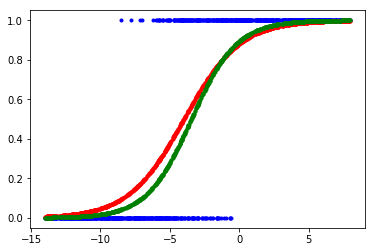

In [10]:
# Make prediction using the model
Y_hat = model_classif1.predict(X)

# Plot noisy data, true model and prediction
plot(X,Y,'b.')
plot(X,Y_true,'r.')
plot(X,Y_hat,'g.')

Now, let us consider a more complicated classification model where we have 2 input variables ($X_0$, $X_1$) and a binary output variable $Y$. The link between the $X$ variables and $Y$ is nonlinear (moon shape).

Text(0,0.5,'X_1')

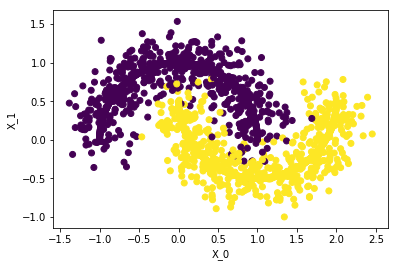

In [11]:
# Import machine learning library
from sklearn.datasets import make_moons

# Generate data
n=1000
X_true,Y_true=make_moons(noise=0.00001,random_state=0,n_samples=n) # true model
X,Y=make_moons(noise=0.2,random_state=0,n_samples=n) # noisy data

# Plot true model and noisy data
scatter(X[:,0], X[:,1], c=Y)
scatter(X_true[:,0], X_true[:,1], c=Y_true)
xlabel('X_0')
ylabel('X_1')

Try first to adjust a simple neural net with 1 hidden layer, 1 neurone and a logistic loss function. Then, test 
a more complex network with 3 hidden layers and relu (rectified linear unit) activations. For more information concerning the different activation functions, please see https://fr.wikipedia.org/wiki/Fonction_d'activation#cite_note-7. We stock the fitted model in the variable *history*.

In [ ]:
# Build our model
model_classif2 = Sequential()
 
# Declare the layers
#layers = [Dense(units=1, input_dim=2), Activation('sigmoid')] # try this one first
layers = [Dense(units=4, input_dim=2), Activation('relu'), # then this one
          Dense(units=4, input_dim=4), Activation('relu'),
          Dense(units=1, input_dim=4), Activation('sigmoid')]

# Add the layers to the model
for layer in layers:
    model_classif2.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01) # try this one first
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Compile our model
model_classif2.compile(loss='binary_crossentropy', optimizer=adam) # sgd or adam
 
# Fit the model
history = model_classif2.fit(X, Y, validation_split=0.2, epochs=1000, verbose=0)

# Model weights
model_classif2.get_weights()

In [ ]:
# Make prediction using the model
Y_hat = model_classif2.predict(X)

# Plot noisy data, true model and prediction
subplot(2,2,1)
scatter(X[:,0], X[:,1], c=Y)
scatter(X_true[:,0], X_true[:,1], c=Y_true)
title('Noisy data and true model')
subplot(2,2,2)
scatter(X[:,0], X[:,1], c=Y_hat[:,0])
scatter(X_true[:,0], X_true[:,1], c=Y_true)
title('Noisy data and predictions')

The predicted values (right) are given between $0$ (blue) and $1$ (yellow). The algorithm converges when the classification boundary is well defined between the 2 scatter plots. Finally, we can use the *history* variable and plot the evolution of the loss function for the training and test datasets.

In [ ]:
# Summarize history for loss
plot(history.history['loss'])
plot(history.history['val_loss'])
ylabel('loss')
xlabel('epoch')
legend(['train', 'test'])

**Classification problem on real data**

Congratulations, you are now ready to apply regression or classification problems on real data. Here, we propose to use a well known dataset in statistic: *iris*. The output variable $y$ are different iris species (Setosa, Versicolour, Virginica) and input variables $x$ are the length/width of the sepal/petal. Try to construct your own neural net, learn it on a training dataset ($x_{train}$ and $x_{train}$, 80%) and test it on a independant test dataset ($x_{test}$ and $y_{test}$, 20%).

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Load data
iris = datasets.load_iris()
X = iris.data
Y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [2]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [14]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix

model_perso = Sequential()
layers = [Dense(units=4, input_dim=4), Activation('relu'), # then this one
          Dense(units=4, input_dim=4), Activation('relu'),
          Dense(units=1, input_dim=4), Activation('sigmoid')]

# Add the layers to the model
for layer in layers:
    model_perso.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01) # try this one first
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Compile our model
model_perso.compile(loss='binary_crossentropy', optimizer=adam) # sgd or adam
 
# Fit the model
history = model_perso.fit(x_train, y_train)
y_pred_test = model_perso.predict(x_test)
print(y_pred_test, y_test)

print(confusion_matrix(y_test, y_pred_test))

Epoch 1/1
120/120 [==============================] - 0s 3ms/step - loss: 1.1107
[[0.4222778 ]
 [0.4505778 ]
 [0.34208894]
 [0.36921024]
 [0.4140654 ]
 [0.32356122]
 [0.38126498]
 [0.3905258 ]
 [0.4052562 ]
 [0.29002005]
 [0.4401653 ]
 [0.39333668]
 [0.44531694]
 [0.40077013]
 [0.38702002]
 [0.34925365]
 [0.327159  ]
 [0.42067838]
 [0.3553011 ]
 [0.34848216]
 [0.45112664]
 [0.43456733]
 [0.3935037 ]
 [0.44324422]
 [0.41599205]
 [0.3295514 ]
 [0.38831976]
 [0.4094865 ]
 [0.4226157 ]
 [0.34512642]] [0 1 2 1 1 1 1 0 1 2 0 1 0 1 0 1 2 0 2 2 0 0 1 0 0 1 0 1 0 2]


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets